In [1]:
pip install streamlit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import streamlit as st

In [3]:
# Load dataset
data = pd.read_csv('C://Users//Ishan-world//Downloads//job_descriptions.csv')

# View dataset info
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Display first few rows
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [4]:
# Count missing values
missing_values = data['Company Profile'].isnull().sum()
print(f"Number of missing values in 'Company Profile': {missing_values}")


Number of missing values in 'Company Profile': 5478


In [5]:
# Display a few non-null rows from the 'Company Profile' column
print(data['Company Profile'].dropna().head(10))


0    {"Sector":"Diversified","Industry":"Diversifie...
1    {"Sector":"Financial Services","Industry":"Com...
2    {"Sector":"Insurance","Industry":"Insurance: P...
3    {"Sector":"Energy","Industry":"Mining, Crude-O...
4    {"Sector":"Energy","Industry":"Energy - Oil & ...
5    {"Sector":"Infrastructure","Industry":"Ports a...
6    {"Sector":"Logistics","Industry":"Mail, Packag...
7    {"Sector":"Transportation","Industry":"Transpo...
8    {"Sector":"Media & Entertainment","Industry":"...
9    {"Sector":"Transportation","Industry":"Railroa...
Name: Company Profile, dtype: object


In [6]:
data['Company Profile'].fillna("Not Available", inplace=True)

In [7]:
# Check for missing values again
print(data['Company Profile'].isnull().sum())

0


In [8]:
# Check for missing values
print(data.isnull().sum())

Job Id              0
Experience          0
Qualifications      0
Salary Range        0
location            0
Country             0
latitude            0
longitude           0
Work Type           0
Company Size        0
Job Posting Date    0
Preference          0
Contact Person      0
Contact             0
Job Title           0
Role                0
Job Portal          0
Job Description     0
Benefits            0
skills              0
Responsibilities    0
Company             0
Company Profile     0
dtype: int64


In [9]:
# Drop irrelevant columns
data.drop(columns=['Job Id'], inplace=True)

print(data['Salary Range'].head(10))

0     $59K-$99K
1    $56K-$116K
2    $61K-$104K
3     $65K-$91K
4     $64K-$87K
5     $59K-$93K
6    $63K-$103K
7    $65K-$102K
8    $65K-$102K
9     $60K-$80K
Name: Salary Range, dtype: object


In [10]:
# Remove non-numeric characters except for '-' (used as a separator)
data['Salary Range'] = data['Salary Range'].str.replace(r'[^0-9\-]', '', regex=True)
print(data['Salary Range'].head(10))

0     59-99
1    56-116
2    61-104
3     65-91
4     64-87
5     59-93
6    63-103
7    65-102
8    65-102
9     60-80
Name: Salary Range, dtype: object


In [11]:
print(data['Salary Range'])

0           59-99
1          56-116
2          61-104
3           65-91
4           64-87
            ...  
1615935    64-114
1615936    62-130
1615937     60-96
1615938    65-103
1615939    56-109
Name: Salary Range, Length: 1615940, dtype: object


In [12]:
# Step 2: Split Salary Range into Min and Max
split_salary = data['Salary Range'].str.split('-', expand=True)

# Check if the split resulted in exactly two columns
if split_salary.shape[1] == 2:
    data[['Min Salary', 'Max Salary']] = split_salary
else:
    # Handle cases where splitting didn't work as expected
    print("Some rows in 'Salary Range' did not split correctly. Check for issues in the data.")
    print(data[~data['Salary Range'].str.contains('-', na=False)])  # Print problematic rows
    raise ValueError("Unable to split 'Salary Range' into two columns.")

# Step 3: Convert to Numeric
data['Min Salary'] = pd.to_numeric(data['Min Salary'], errors='coerce')
data['Max Salary'] = pd.to_numeric(data['Max Salary'], errors='coerce')

# Step 4: Calculate Average Salary
data['Avg Salary'] = data[['Min Salary', 'Max Salary']].mean(axis=1)

# Step 5: Handle NaN Values
#data['Avg Salary'] = data['Avg Salary'].fillna(data['Min Salary']).fillna(data['Max Salary'])
#data['Avg Salary'].fillna(data['Avg Salary'].mean(), inplace=True)

# Step 6: Verify
print(data['Avg Salary'].isnull().sum())

0


In [13]:
data.drop(columns=['Salary Range', 'Min Salary', 'Max Salary'], inplace=True)

# View dataset info
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Display first few rows
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Experience        1615940 non-null  object 
 1   Qualifications    1615940 non-null  object 
 2   location          1615940 non-null  object 
 3   Country           1615940 non-null  object 
 4   latitude          1615940 non-null  float64
 5   longitude         1615940 non-null  float64
 6   Work Type         1615940 non-null  object 
 7   Company Size      1615940 non-null  int64  
 8   Job Posting Date  1615940 non-null  object 
 9   Preference        1615940 non-null  object 
 10  Contact Person    1615940 non-null  object 
 11  Contact           1615940 non-null  object 
 12  Job Title         1615940 non-null  object 
 13  Role              1615940 non-null  object 
 14  Job Portal        1615940 non-null  object 
 15  Job Description   1615940 non-null  object 
 16  

,Experience,Qualifications,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,...,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Avg Salary
0,5 to 15 Years,M.Tech,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,...,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",79.0
1,2 to 12 Years,BCA,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,...,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",86.0
2,0 to 12 Years,PhD,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,...,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",82.5
3,4 to 11 Years,PhD,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,...,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",78.0
4,1 to 12 Years,MBA,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,...,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",75.5


In [14]:
print(data['Experience'].head(10))

0    5 to 15 Years
1    2 to 12 Years
2    0 to 12 Years
3    4 to 11 Years
4    1 to 12 Years
5    4 to 12 Years
6    3 to 15 Years
7     2 to 8 Years
8     2 to 9 Years
9    1 to 10 Years
Name: Experience, dtype: object


In [15]:
# Step 1: Clean and extract the numeric ranges
data[['Min Experience', 'Max Experience']] = data['Experience'].str.extract(r'(\d+)\s*to\s*(\d+)', expand=True)

# Step 2: Convert to numeric
data['Min Experience'] = pd.to_numeric(data['Min Experience'], errors='coerce')
data['Max Experience'] = pd.to_numeric(data['Max Experience'], errors='coerce')

# Step 3: Calculate average experience
data['Avg Experience'] = data[['Min Experience', 'Max Experience']].mean(axis=1)

# Step 4: Handle NaN values (if any)
#data['Avg Experience'].fillna(data['Avg Experience'].mean(), inplace=True)

# Step 5: Verify the result
print(data['Avg Experience'])

0          10.0
1           7.0
2           6.0
3           7.5
4           6.5
           ... 
1615935     6.0
1615936     8.0
1615937     9.5
1615938    10.0
1615939     6.0
Name: Avg Experience, Length: 1615940, dtype: float64


In [16]:
data.drop(columns=['Experience','Min Experience', 'Max Experience'], inplace=True)

# View dataset info
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Display first few rows
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Qualifications    1615940 non-null  object 
 1   location          1615940 non-null  object 
 2   Country           1615940 non-null  object 
 3   latitude          1615940 non-null  float64
 4   longitude         1615940 non-null  float64
 5   Work Type         1615940 non-null  object 
 6   Company Size      1615940 non-null  int64  
 7   Job Posting Date  1615940 non-null  object 
 8   Preference        1615940 non-null  object 
 9   Contact Person    1615940 non-null  object 
 10  Contact           1615940 non-null  object 
 11  Job Title         1615940 non-null  object 
 12  Role              1615940 non-null  object 
 13  Job Portal        1615940 non-null  object 
 14  Job Description   1615940 non-null  object 
 15  Benefits          1615940 non-null  object 
 16  

,Qualifications,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,...,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Avg Salary,Avg Experience
0,M.Tech,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,...,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",79.0,10.0
1,BCA,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,...,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",86.0,7.0
2,PhD,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,...,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",82.5,6.0
3,PhD,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,...,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",78.0,7.5
4,MBA,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,...,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",75.5,6.5


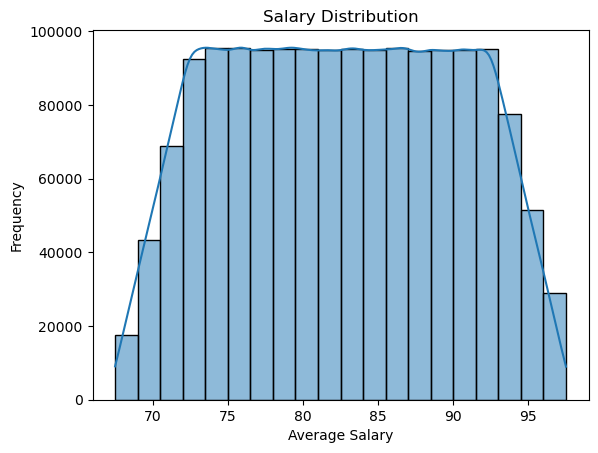

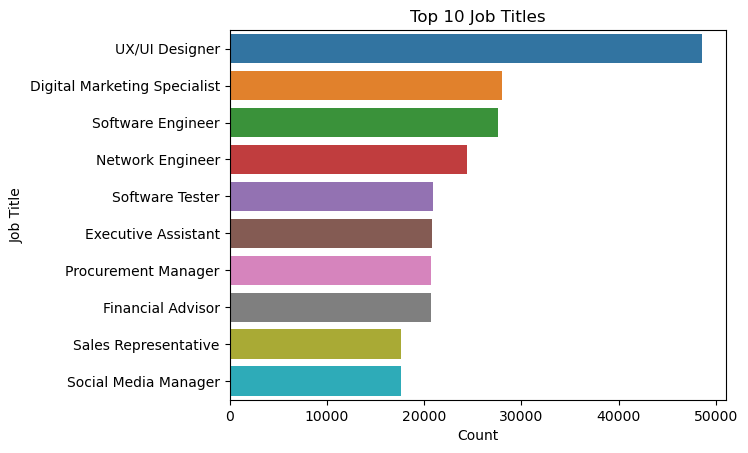

In [17]:
# Salary distribution
sns.histplot(data['Avg Salary'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

# Job title frequency
top_jobs = data['Job Title'].value_counts().head(10)
sns.barplot(y=top_jobs.index, x=top_jobs.values)
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

In [18]:
data['Avg Salary'] = data['Avg Salary'].round().astype(int)
data['Avg Experience'] = data['Avg Experience'].round().astype(int)
# Converting columns to category datatype
data['Job Title'] = data['Job Title'].astype('category')
data['location'] = data['location'].astype('category')
data['skills'] = data['skills'].astype('category')
# Verify the changes
print(data.dtypes)


Qualifications        object
location            category
Country               object
latitude             float64
longitude            float64
Work Type             object
Company Size           int64
Job Posting Date      object
Preference            object
Contact Person        object
Contact               object
Job Title           category
Role                  object
Job Portal            object
Job Description       object
Benefits              object
skills              category
Responsibilities      object
Company               object
Company Profile       object
Avg Salary             int32
Avg Experience         int32
dtype: object


In [19]:
# Split features and target variable
X = data[['Job Title', 'location', 'Avg Experience', 'skills']]
y = data['Avg Salary']

# OneHotEncoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Job Title', 'location','skills']),
        ('num', StandardScaler(), ['Avg Experience'])
    ]
)

In [20]:
# Define model pipeline
from sklearn.linear_model import LinearRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

MAE: 6.480632428389942, MSE: 56.83429805751384, R2: -0.0004779800300658277


In [24]:
# Transform the data using the pipeline's preprocessor
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

,Job Title,location,Avg Experience,skills
108318,Procurement Manager,Panama City,8,Supplier diversity programs Diversity and incl...
7787,Architectural Designer,Tunis,6,Architectural drafting AutoCAD 2D and 3D model...
1237496,Art Teacher,Harare,6,Art education curriculum Program development T...
55757,Environmental Consultant,Tirana,8,Environmental impact analysis Data collection ...
818970,Art Teacher,City of Baghdad,8,Art education curriculum Program development T...


In [22]:
import shap

# Create SHAP explainer for linear models
explainer = shap.LinearExplainer(pipeline.named_steps['model'], X_train_transformed)
shap_values = explainer.shap_values(X_test_transformed)

# Plot feature importance
shap.summary_plot(shap_values, X_test_transformed)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# Save the pipeline
import joblib
joblib.dump(pipeline, 'salary_predictor.pkl')

# Streamlit app
st.title('Salary Range Prediction')

# Input fields
job_title = st.text_input('Job Title')
location = st.text_input('location')
experience = st.number_input('Years of Experience', min_value=0, max_value=50, step=1)

if st.button('Predict Salary'):
    user_data = pd.DataFrame([[job_title, location, experience]], 
                             columns=['Job Title', 'location', 'Experience Required'])
    salary_pred = pipeline.predict(user_data)[0]
    st.write(f'Predicted Average Salary: ${salary_pred:.2f}')
